# CodeAlong: From Distributions to Hypotheses

## Learning Objectives

- To be able to use probability density functions to calculate probability of specific values.

- To identify normally distributed features.
- To perform a hypothesis test to compare numeric data between 2 groups.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

## Exploring Distributions 

Dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/student.mat.csv',sep =';')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         0 non-null      float64
 2   age         0 non-null      float64
 3   address     0 non-null      float64
 4   famsize     0 non-null      float64
 5   Pstatus     0 non-null      float64
 6   Medu        0 non-null      float64
 7   Fedu        0 non-null      float64
 8   Mjob        0 non-null      float64
 9   Fjob        0 non-null      float64
 10  reason      0 non-null      float64
 11  guardian    0 non-null      float64
 12  traveltime  0 non-null      float64
 13  studytime   0 non-null      float64
 14  failures    0 non-null      float64
 15  schoolsup   0 non-null      float64
 16  famsup      0 non-null      float64
 17  paid        0 non-null      float64
 18  activities  0 non-null      float64
 19  nursery     0 non-null      f

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Calculate an Avg Grade column by averaging G1, G2,G3, 
# then divide by 20, and * 100 (to make %'s')
df['avg grade'] = df[['G1','G2','G3']].mean(axis=1)/20*100

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg grade
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

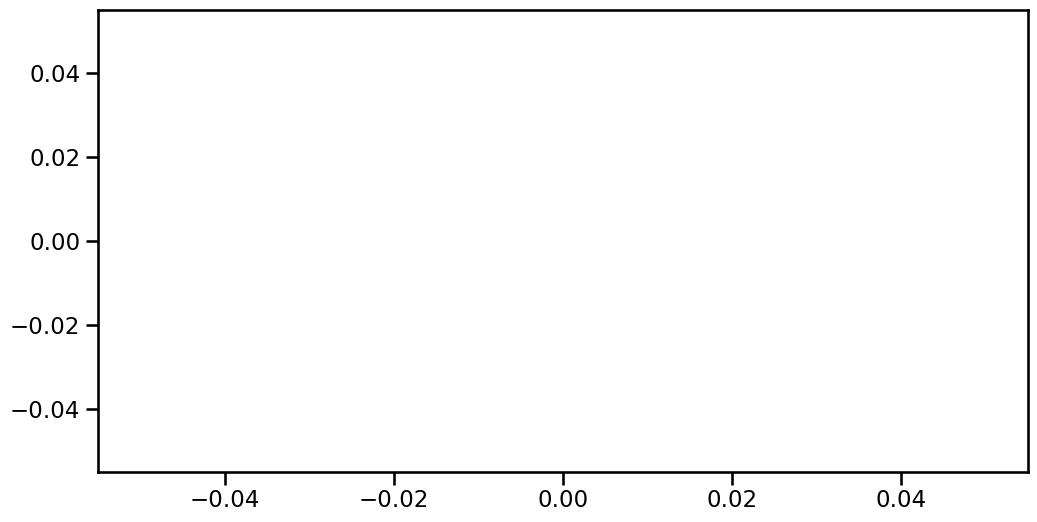

In [6]:
## plot the distribution of Avg Grade 
sns.histplot(data= df, x= 'avg grade',kde = True)

> Is it normally distributed?

In [7]:

## use scipy's normaltest
stats.normaltest(df['avg grade'])

KeyError: 'Avg Grade'

- We have our p-value for our normaltest, but what does it mean??
    - Check the docstring for the normaltest to find out the null hypothesis of the test.

### Calculating Probabilities with Scipy's  Probability Density Functions

In [ ]:
## Get the mean, std, min, and max for the Avg Grade column
dist_stats = df['avg grade'].agg['mean', 'std', 'min', 'max']
dist stats

In [ ]:
## generate a linearly-spaced array of values that span the min to the max
xs= np.iinspace(dist_stats.loc['min'], dist_stats.loc['max'])

In [ ]:
## use stats.norm.pdf to get the PDF curve that corresponds to your distribution's values


In [ ]:
## Plot the histogram again AND then plot the pdf we calculated.


> Looks pretty normal! But can we confirm for a fact that its normal?

### Q1: what is the probability of a student getting a score of 90 or above?

In [ ]:
## Plot the histogram again AND pdf again


## Add a vpsan to the plot showing the region we want to calc prob for


> How can we calculate this probability? Can we use the PDF?

In [ ]:
## try making a list of values from 90-100 and getting the pdf values

## Sum the values to get the total probability. 


> Whats the flaw to this approach?

> Now, we want the opposite probability, probability of being GREATER Than 90.


In [ ]:
# calc 1-prob of 90 or lower.


- Answer: there is a 2.4% chance of having a score greater than 90.

# Hypothesis Testing

## Q: Do students with internet access have different average grades than students who do not have internet access?

### State The Hypothesis 

- $H_0$ (Null Hypothesis): Students with internet access have the same average grades as students who do not. 
- $H_A$ (Alternative Hypothesis): Students with internet access have significantly different average grades compared to students who do not. 

### Visualize and Separate Groups

- Visualize the histogram of Avg Grade again, but separate it into groups based on the "internet" column.
- Note: when comparing 2 groups with seaborn's histplot, you will want to add `common_norm=False`

In [ ]:
## visualize the histobram of Avg Grade again, but separate it by "internet"
sns.histplot(data=df, x='avg grade', hue='internet',common_norm=False, 
             stat='density',kde=True)

In [ ]:
## Plot a bar plot of the Avg Grade for students with internet vs those that do not have it
sns.barplot(data=df, y='avg grade', x='internet',)

In [ ]:
## Separate the 2 groups into 2 varaibles
grp_yes = df.loc[ df['internet']=='yes','avg grade']
grp_yes
grp_no = df.loc[ df['internet']!='yes','avg grade']
grp_no

### T-Test Assumptions

- Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (AKA independent T-test).

- The Assumptions are:
    - No significant outliers
    - Normality 
    - Equal Variance 

#### Assumption: No Sig. Outliers

In [ ]:
## check yes group for outliers using z-score >3 rule.
idx_outliers_yes = np.abs(stats.zscore(grp_yes)) > 3
idx_outliers_yes.sum()

In [ ]:
## check no group for outliers using z-score >3 rule.
idx_outliers_no = np.abs(stats.zscore(grp_no)) > 3
idx_outliers_no.sum()

> No outliers to worry about! Assumption met.

#### Assumption: Normally Distributed Groups

In [ ]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(grp_no)

In [ ]:
## use normaltest to check if no group is normally distributed
stats.normaltest(grp_yes)

>- Did we meet the assumption of normality?

#### Assumption: Equal Variance

In [ ]:
## use Levene's test to check if groups have equal variance
stats.levene(grp_no, grp_yes)

> Did we meet the assumption of equal variance?

### Perform Final Hypothesis Test (T-Test)

- Since we met all of the assumptions for the test we can proceed with our t-test.
    - Next class we will discuss what we would do if we did NOT meet the assumptions.

In [ ]:
## run stats.ttest_ind on the 2 groups
stats.ttest_ind(grp_no, grp_yes)

> What is our p-value? Is it less than our alpha of .05? What does this mean?

>Our T-Test returned a p-value of `____`. Since p `</>`.05, we `can reject/fail to reject` the null hypothesis that students with internet access have the same average grades as students who do not. 

We therefore conclude that there `is/is not` a significant difference in Average Grades between students who do/do not have internet access.

Our visualization below shows that students with internet access have `HIGHER/LOWER/EQUAL` average grades.

In [ ]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='internet',y='avg grade')

# Challenge : What is the probability of a student getting a score of less than 30 ?

In [ ]:
## Plot the histogram again AND pdf again


## Add a vpsan to the plot showing the region we want to calc prob for


> How can we calculate this probability? Can we use the PDF  ?

In [ ]:
## try making a list of values less than 30 and getting the pdf values


## Sum the values to get the total probability. 


OR

In [ ]:

## Use the cumulative density function to find prob of 30 OR lower.
cdf_30 = stats.norm.cdf(30, loc=dist_stats.loc['mean'], scale=dist_stats.loc['std'])
cdf_30

- Answer: